<a href="https://colab.research.google.com/github/Gweneal3/Machine_Learning_YT/blob/master/Customer%20Segmentation/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection

In [3]:
customer_data = pd.read_csv('./Mall_Customers.csv')

In [4]:
print(customer_data.shape)

(200, 5)


In [5]:
print(customer_data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
print(customer_data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
print(customer_data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Choosing Annual Income Column and Spending Score Column

In [16]:
X = customer_data.iloc[:,[3,4]].values # X = customer_data.drop(['CustomerID','Age','Gender'],axis=1).values

In [ ]:
print(X)

Choosing the number of clusters<br>
WCSS -> Within Clusters Sum of Squares

In [24]:
# finding wcss value for different number of clsuters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=38,n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

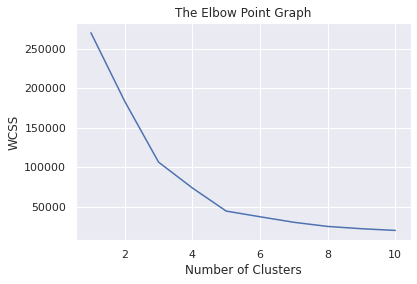

In [27]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show() # Elbow point = 3 or 5, choose 5

Optimum number of clusters =5

Training k-Means Clustering Model

In [29]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=38,n_init=10)

# return a lebel for each data point based on their cluster
Y = kmeans.fit_predict(X)

In [30]:
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 4 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 1 0 4 0 1 0 1 0 4 0 1 0 1 0 1 0 1 0 4 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


Visualising all Clusters

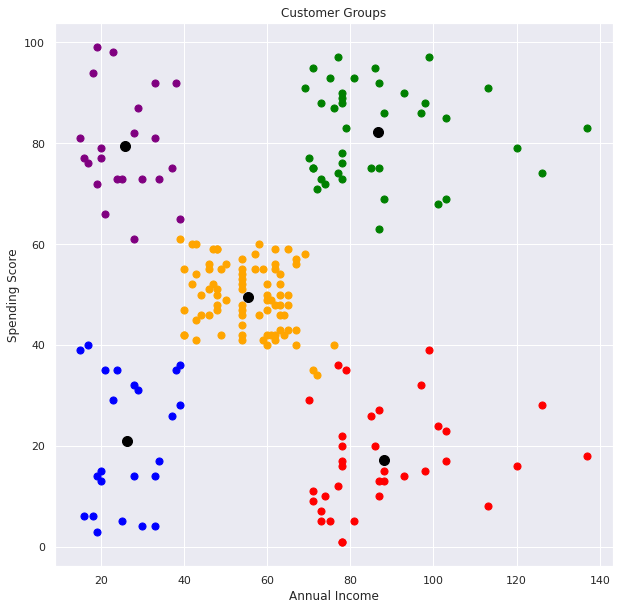

In [43]:
# plot all clusters and their centroids
plt.figure(figsize=(10,10))
plt.title("Customer Groups")
plt.ylabel("Spending Score")
plt.xlabel("Annual Income")
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='orange', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')